### Company Data using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

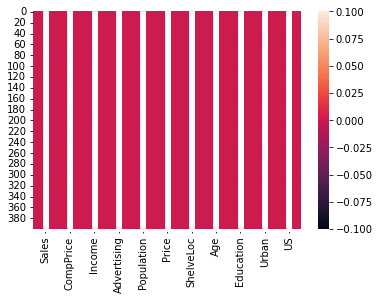

In [6]:
sns.heatmap(df.isnull(),annot=True)

In [7]:
#Checking CoRelation  Pearson
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

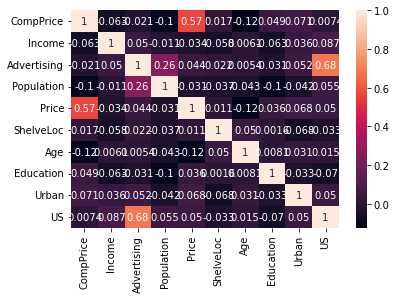

In [41]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df[df.corr()>80].sum() # No High Correlation Found between Features

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc        0
Age            0.0
Education      0.0
Urban            0
US               0
dtype: object

In [9]:
#Checking CoRelation using Spearman Rank 
df.corr(method ='spearman')

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.067639,0.155368,0.275396,0.041937,-0.407607,-0.236344,-0.034474
CompPrice,0.067639,1.000000,-0.066029,-0.028589,-0.108904,0.541795,-0.108612,0.021278
Income,0.155368,-0.066029,1.000000,0.057809,-0.007395,-0.049111,0.002594,-0.061347
Advertising,0.275396,-0.028589,0.057809,1.000000,0.241933,0.035613,0.005157,-0.046220
Population,0.041937,-0.108904,-0.007395,0.241933,1.000000,-0.006022,-0.041474,-0.104593
Price,-0.407607,0.541795,-0.049111,0.035613,-0.006022,1.000000,-0.118385,0.024439
Age,-0.236344,-0.108612,0.002594,0.005157,-0.041474,-0.118385,1.000000,0.004458
Education,-0.034474,0.021278,-0.061347,-0.046220,-0.104593,0.024439,0.004458,1.000000


<AxesSubplot:>

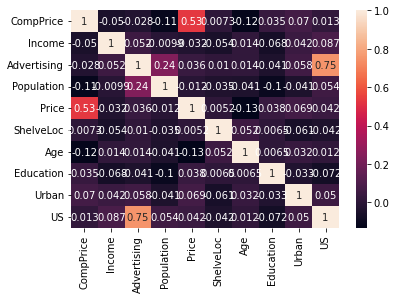

In [42]:
sns.heatmap(df.corr(method ='spearman'),annot=True)

In [10]:
df[df.corr(method ='spearman')>80].sum() # No correation Found

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc        0
Age            0.0
Education      0.0
Urban            0
US               0
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder

In [13]:
df.select_dtypes(object).columns

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [14]:
calcols=df.select_dtypes(object).columns
oe=OrdinalEncoder()
df[calcols]=oe.fit_transform(df[calcols])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [15]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=10,contamination=0.01)
out=iso.fit_predict(df)

In [16]:
df["outliers"]=out
df["outliers"].value_counts()


 1    396
-1      4
Name: outliers, dtype: int64

In [17]:
# Dropping The ouliers
df=df[df["outliers"]== 1]
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outliers
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0,1
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0,1
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0,1
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0,1
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0,1
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0,1
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0,1
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0,1


In [18]:
df=df.drop(["outliers"],axis=1)

In [19]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


<AxesSubplot:>

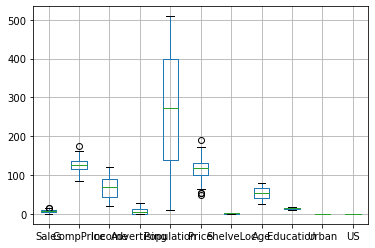

In [20]:
df.boxplot()

In [21]:
df["Sales"].min()

0.16

In [22]:
df["Sales"].max()

16.27

In [23]:
# Converting Taget columns from Regression To Categorical as mentioned
bins=[0,8,16.27]

sales_conversion=["Small","Large"]

df["Cat_Sales"]=pd.cut(df["Sales"],bins,labels=sales_conversion)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Cat_Sales
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0,Large
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0,Large
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0,Large
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0,Small
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0,Large
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0,Small
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0,Small
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0,Small


In [24]:
# Drooping the original Reg target column

df=df.drop("Sales",axis=1)

In [25]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Cat_Sales
0,138,73,11,276,120,0.0,42,17,1.0,1.0,Large
1,111,48,16,260,83,1.0,65,10,1.0,1.0,Large
2,113,35,10,269,80,2.0,59,12,1.0,1.0,Large
3,117,100,4,466,97,2.0,55,14,1.0,1.0,Small
4,141,64,3,340,128,0.0,38,13,1.0,0.0,Small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0,Large
396,139,23,3,37,120,2.0,55,11,0.0,1.0,Small
397,162,26,12,368,159,2.0,40,18,1.0,1.0,Small
398,100,79,7,284,95,0.0,50,12,1.0,1.0,Small


In [26]:
x=df.iloc[:,:-1]
y=df["Cat_Sales"]

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape


((277, 10), (119, 10), (277,), (119,))

In [28]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [29]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       Large       0.67      0.72      0.69        46
       Small       0.81      0.78      0.80        73

    accuracy                           0.76       119
   macro avg       0.74      0.75      0.75       119
weighted avg       0.76      0.76      0.76       119



In [31]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

1.0


0.7563025210084033

## HYperparamter Tunning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
params={'criterion':["gini","entropy"],
       'splitter' : ["best", "random"],
       'max_depth' :[2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
       }

In [34]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params,)

In [35]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31],
                         'splitter': ['best', 'random']})

In [36]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}

In [37]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=30, splitter= 'random')

In [38]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       Large       0.65      0.72      0.68        46
       Small       0.81      0.75      0.78        73

    accuracy                           0.74       119
   macro avg       0.73      0.74      0.73       119
weighted avg       0.75      0.74      0.74       119



In [40]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

1.0


0.7394957983193278

In [51]:
plt.rcParams['figure.figsize'] = (30,30)
plt.rcParams['figure.dpi'] = 250

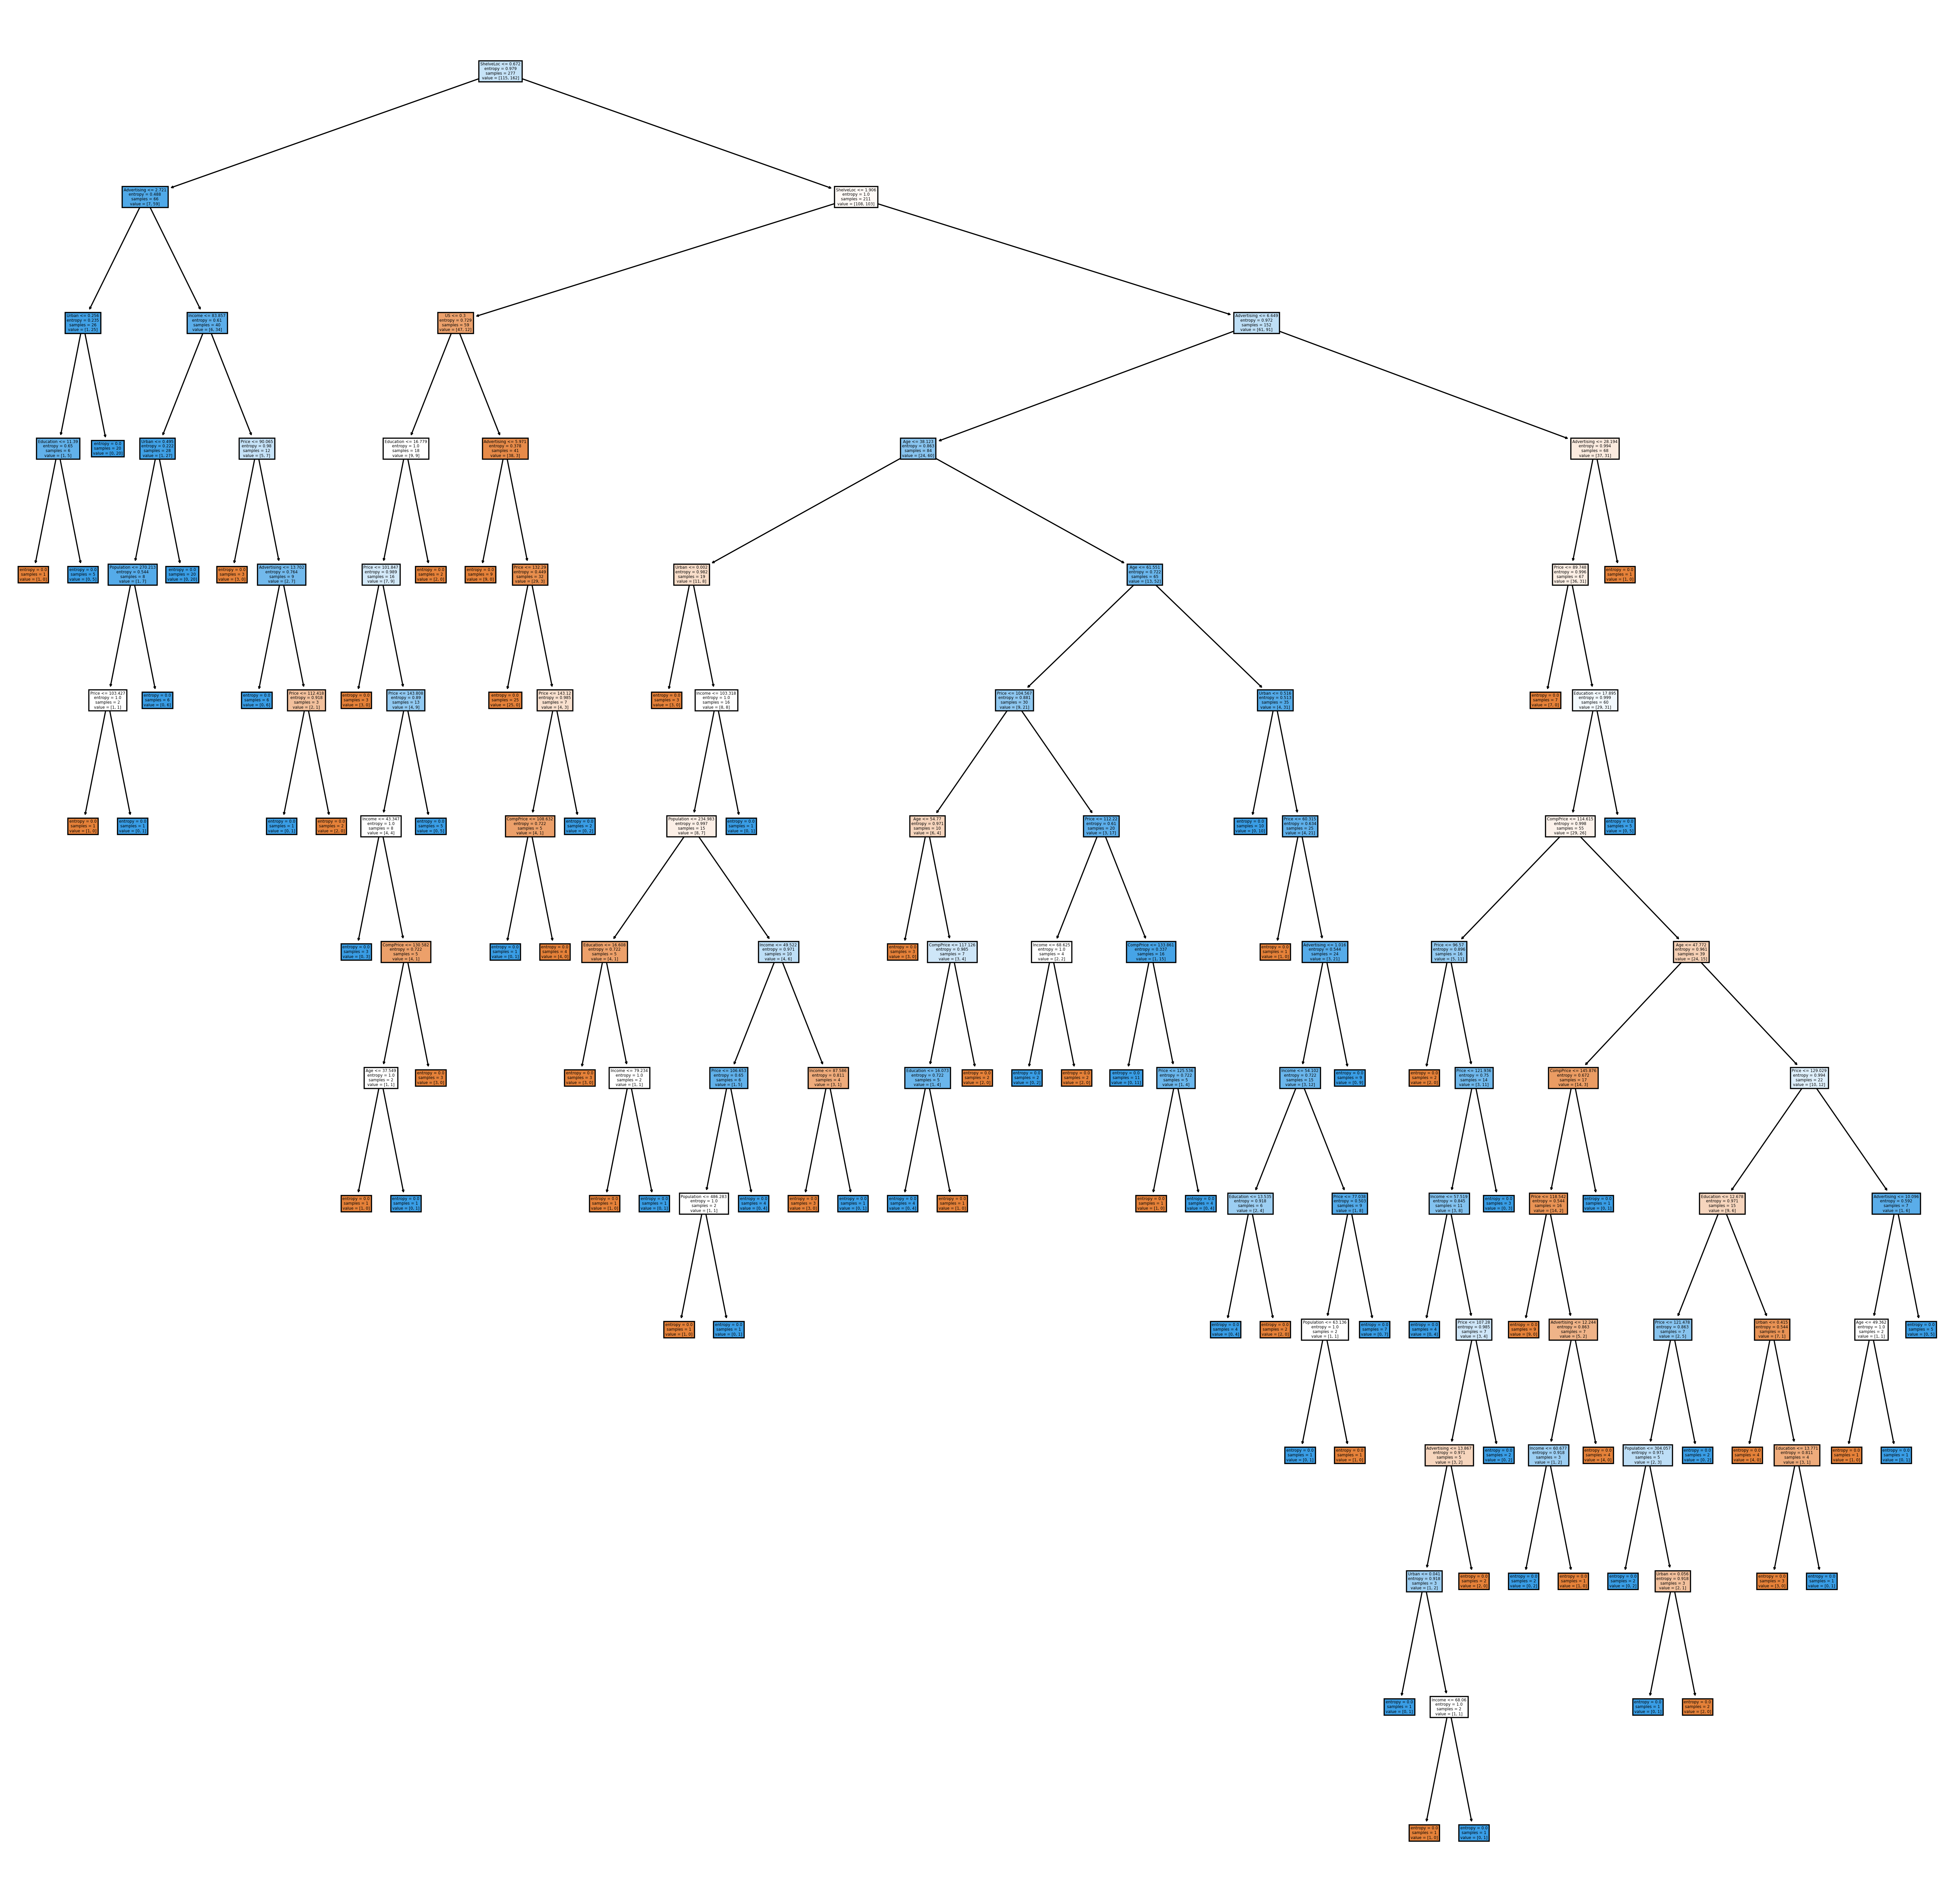

In [52]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()